age: [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
sex: [1 0]
cp: [3 2 1 0]
trestbps: [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
chol: [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 176 241 131]
fbs: [1 0]

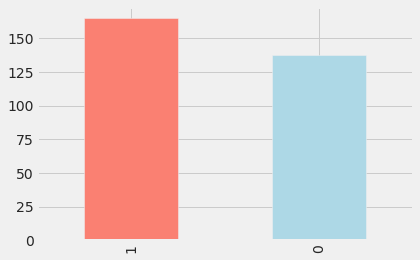

In [2]:
from pandas.core.arrays import categorical
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

df = pd.read_csv("/content/sample_data/heart.csv")
df.head()

pd.set_option("display.float", "{:2}".format)
df.describe()

df.target.value_counts().plot(kind="bar", color=["salmon", "lightblue"])

# checking for messsing values
df.isna().sum()

categorical_val = []
continous_val = []
for column in df.columns:
  print('='*25)
  print(f"{column}: {df[column].unique()}")
  if len(df[column].unique()) <= 10:
    categorical_val.append(column)
  else:
     continous_val.append(column)

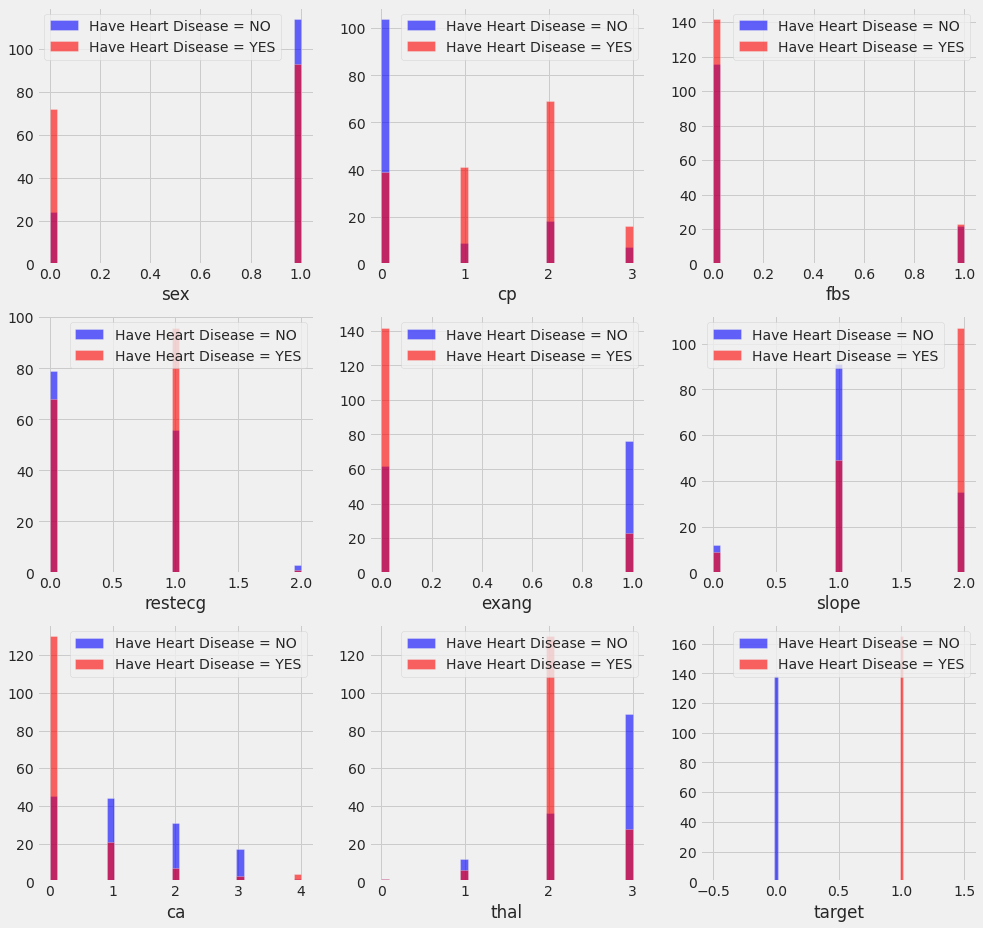

In [3]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(categorical_val, 1):
  plt.subplot(3,3,i)
  df[df["target"] == 0][column].hist(bins=35, color="blue", label="Have Heart Disease = NO", alpha=0.6)
  df[df["target"] == 1][column].hist(bins=35, color="red", label="Have Heart Disease = YES", alpha=0.6)
  plt.legend()
  plt.xlabel(column)

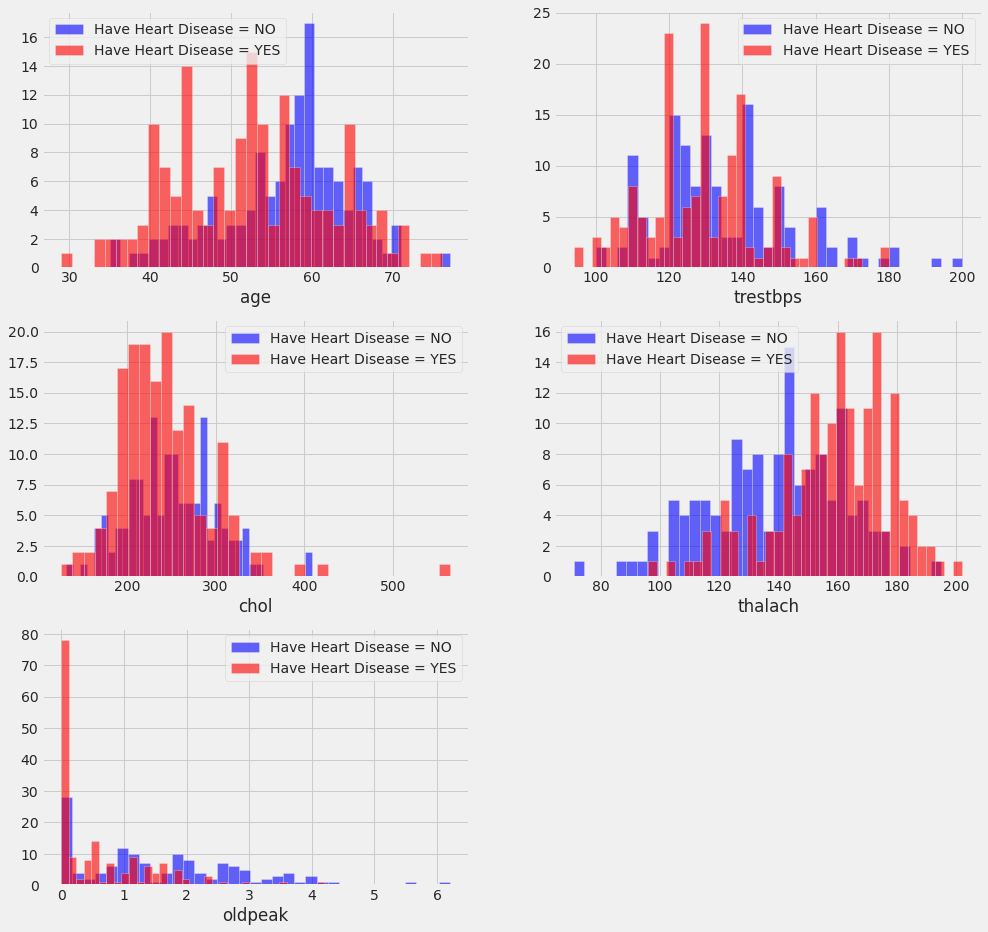

In [4]:
plt.figure(figsize=(15, 15))

for i,column in enumerate(continous_val,1):
  plt.subplot(3,2,i)
  df[df["target"] == 0][column].hist(bins=35, color="blue", label="Have Heart Disease = NO", alpha=0.6)
  df[df["target"] == 1][column].hist(bins=35, color="red", label="Have Heart Disease = YES", alpha=0.6)
  plt.legend()
  plt.xlabel(column)

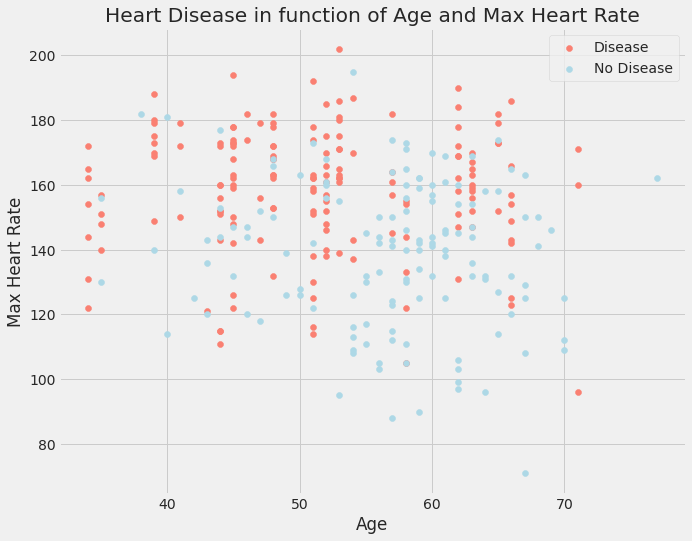

In [5]:
plt.figure(figsize=(10, 8))

# Scatter with positive examples
plt.scatter(df.age[df.age[df.target==1]],
            df.thalach[df.target==1],
            c="salmon")

# Scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c='lightblue') 

# Add some helpful info
plt.title('Heart Disease in function of Age and Max Heart Rate')
plt.xlabel("Age")
plt.ylabel('Max Heart Rate')
plt.legend(['Disease', "No Disease"]);

(14.5, -0.5)

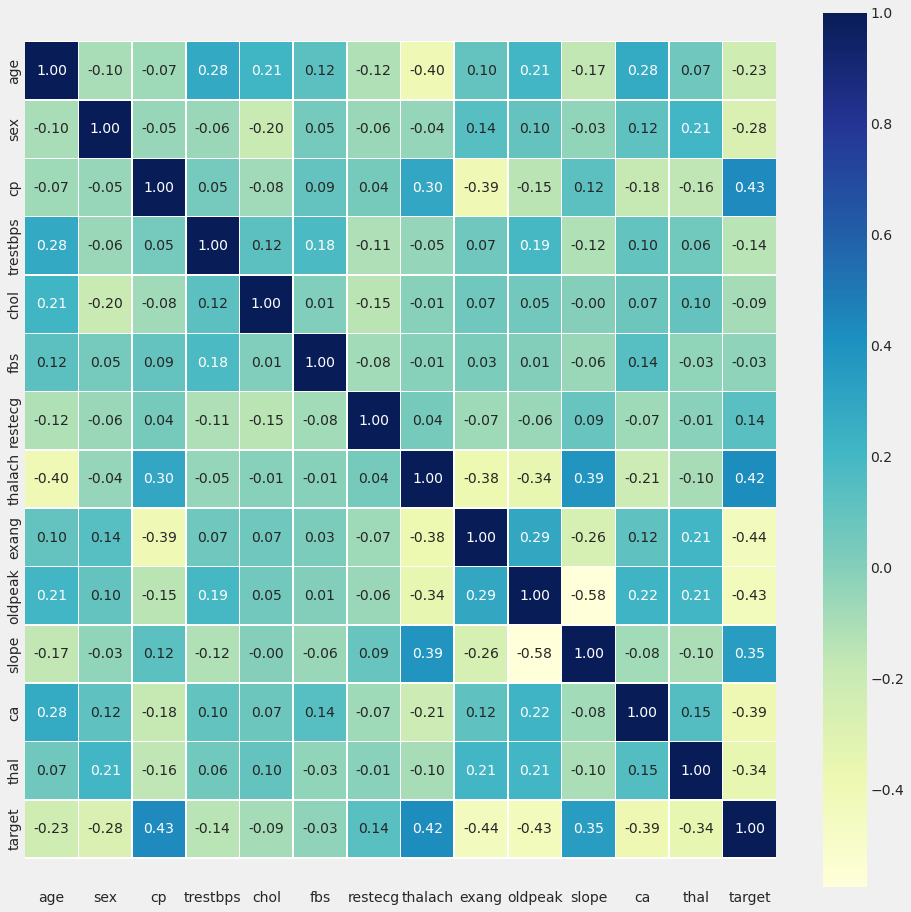

In [9]:
# Let's make our correlation matrix a little prettier
corr_matrix= df.corr()
fig, ax= plt.subplots(figsize=(15,15))
ax= sns.heatmap(corr_matrix,
                annot=True,
                linewidth=0.5,
                fmt=".2f",
                cmap="YlGnBu");
bottom, top=ax.get_ylim()
ax.set_ylim(bottom+0.5, top - 0.5)

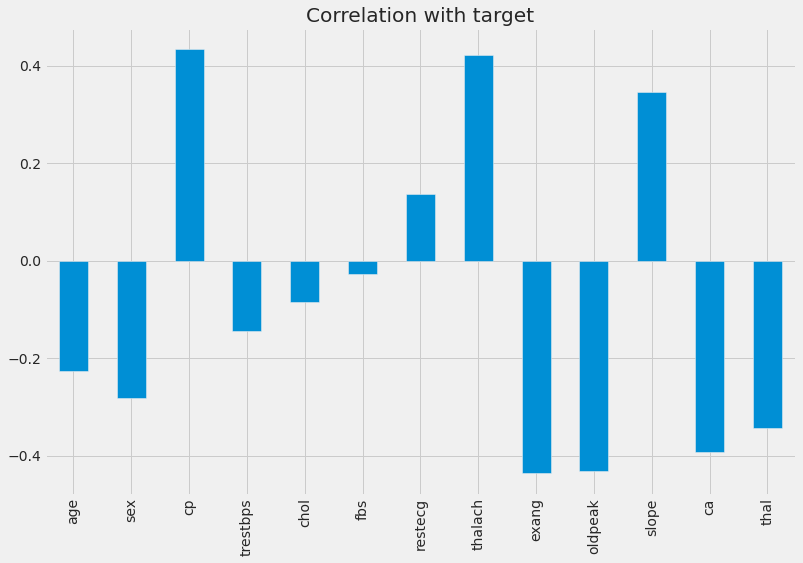

In [10]:
df.drop('target', axis=1).corrwith(df.target).plot(kind='bar', grid=True, figsize=(12,8),
                                                   title="Correlation with target")

In [11]:
categorical_val.remove('target')
dataset = pd.get_dummies(df, columns = categorical_val)

from sklearn.preprocessing import StandardScaler

s_sc = StandardScaler()
col_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[col_to_scale] = s_sc.fit_transform(dataset[col_to_scale])

In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
  if train:
    pred = clf.predict(X_train)
    clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
    print("Train Result:\n================================================")
    print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2}%")
    print("_______________________________________________")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")
    print("_______________________________________________")
    print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

  elif train==False:
    pred = clf.predict(X_test)
    clf_report = pd.DataFrame(classification_report(y_test, pred,output_dict=True))
    print("Test Result:\n================================================") 
    print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
    print("_______________________________________________")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")
    print("_______________________________________________")
    print(f"Confusion Matrix: \n {confusion_matrix(y_test,pred)}\n")

In [20]:
from sklearn.model_selection import train_test_split

x = dataset.drop('target', axis=1)
y = dataset.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [22]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(x_train, y_train)

print_score(lr_clf, x_train, y_train, x_test, y_test, train=True)
print_score(lr_clf, x_train, y_train, x_test, y_test, train=False)

Train Result:
Accuracy Score: 8.7e+01%
_______________________________________________
CLASSIFICATION REPORT:
                           0                  1           accuracy  \
precision 0.8791208791208791  0.859504132231405 0.8679245283018868   
recall    0.8247422680412371 0.9043478260869565 0.8679245283018868   
f1-score   0.851063829787234 0.8813559322033899 0.8679245283018868   
support                 97.0              115.0 0.8679245283018868   

                   macro avg       weighted avg  
precision  0.869312505676142 0.8684797192515888  
recall    0.8645450470640967 0.8679245283018868  
f1-score   0.866209880995312 0.8674958664752432  
support                212.0              212.0  
_______________________________________________
Confusion Matrix: 
 [[ 80  17]
 [ 11 104]]

Test Result:
Accuracy Score: 86.81%
_______________________________________________
CLASSIFICATION REPORT:
                           0                  1           accuracy  \
precision 0.87179487